In [1]:
%matplotlib inline
import os
import time
import numpy as np
import pandas as pd
import matplotlib.lines as mlines
from sklearn.utils import shuffle
from scipy.stats import ortho_group
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from xnn.gamnet import GAMNet

In [2]:
# Simulation
corr = 0.5
noise_sigma = 1
dummy_num = 0
feature_num = 10
test_num = 10000
data_num = 10000

proj_matrix = np.zeros((feature_num,4))
proj_matrix[:7, 0] = np.array([1,0,0,0,0,0,0])
proj_matrix[:7, 1] = np.array([0,1,0,0,0,0,0])
proj_matrix[:7, 2] = np.array([0,0,0.5,0.5,0,0,0])
proj_matrix[:7, 3] = np.array([0,0,0,0,0.2,0.3,0.5])

def data_generator1(data_num, feature_num, corr, proj_matrix, noise_sigma):
    u = np.random.uniform(-1,1, [data_num, 1])
    t= np.sqrt(corr/(1-corr))
    X = np.zeros((data_num, feature_num))
    for i in range(feature_num):
        X[:, i:i+1] = (np.random.uniform(-1,1,[data_num,1])+t*u)/(1+t)
    Y = np.reshape(2*np.dot(X, proj_matrix[:,0])+0.2*np.exp(-4*np.dot(X, proj_matrix[:,1])) + \
              3*(np.dot(X, proj_matrix[:,2]))**2+2.5*np.sin(np.pi*np.dot(X, proj_matrix[:,3])), [-1,1]) + \
              noise_sigma*np.random.normal(0,1, [data_num,1])
    return X, Y

np.random.seed(0)
X, Y = data_generator1(data_num+test_num, feature_num+dummy_num, corr, proj_matrix, noise_sigma)
scaler_x = MinMaxScaler((-1, 1)); scaler_y = MinMaxScaler((-1, 1))
sX = scaler_x.fit_transform(X); sY = scaler_y.fit_transform(Y)
train_x, test_x, train_y, test_y = train_test_split(sX, sY, test_size = test_num)

Initial training.
Training epoch: 1, train loss: 0.08832, val loss: 0.08433
Training epoch: 2, train loss: 0.06671, val loss: 0.06265
Training epoch: 3, train loss: 0.05515, val loss: 0.05188
Training epoch: 4, train loss: 0.04710, val loss: 0.04439
Training epoch: 5, train loss: 0.04174, val loss: 0.03951
Training epoch: 6, train loss: 0.03767, val loss: 0.03563
Training epoch: 7, train loss: 0.03321, val loss: 0.03124
Training epoch: 8, train loss: 0.03216, val loss: 0.03039
Training epoch: 9, train loss: 0.03029, val loss: 0.02849
Training epoch: 10, train loss: 0.02866, val loss: 0.02718
Training epoch: 11, train loss: 0.02845, val loss: 0.02715
Training epoch: 12, train loss: 0.02754, val loss: 0.02644
Training epoch: 13, train loss: 0.02491, val loss: 0.02382
Training epoch: 14, train loss: 0.02477, val loss: 0.02400
Training epoch: 15, train loss: 0.02558, val loss: 0.02517
Training epoch: 16, train loss: 0.02243, val loss: 0.02200
Training epoch: 17, train loss: 0.02110, val lo

Training epoch: 140, train loss: 0.01768, val loss: 0.01844
Training epoch: 141, train loss: 0.02128, val loss: 0.02227
Training epoch: 142, train loss: 0.01700, val loss: 0.01739
Training epoch: 143, train loss: 0.01759, val loss: 0.01836
Training epoch: 144, train loss: 0.01814, val loss: 0.01902
Training epoch: 145, train loss: 0.01723, val loss: 0.01790
Training epoch: 146, train loss: 0.01733, val loss: 0.01789
Training epoch: 147, train loss: 0.01934, val loss: 0.01997
Training epoch: 148, train loss: 0.01741, val loss: 0.01823
Training epoch: 149, train loss: 0.01763, val loss: 0.01802
Training epoch: 150, train loss: 0.01715, val loss: 0.01784
Training epoch: 151, train loss: 0.01707, val loss: 0.01790
Training epoch: 152, train loss: 0.01698, val loss: 0.01758
Training epoch: 153, train loss: 0.01718, val loss: 0.01765
Training epoch: 154, train loss: 0.01697, val loss: 0.01762
Training epoch: 155, train loss: 0.01685, val loss: 0.01731
Training epoch: 156, train loss: 0.01727

Training epoch: 277, train loss: 0.01728, val loss: 0.01779
Training epoch: 278, train loss: 0.01706, val loss: 0.01779
Training epoch: 279, train loss: 0.01698, val loss: 0.01758
Training epoch: 280, train loss: 0.01740, val loss: 0.01787
Training epoch: 281, train loss: 0.01703, val loss: 0.01761
Training epoch: 282, train loss: 0.01689, val loss: 0.01743
Training epoch: 283, train loss: 0.01676, val loss: 0.01729
Training epoch: 284, train loss: 0.01755, val loss: 0.01787
Training epoch: 285, train loss: 0.01686, val loss: 0.01759
Training epoch: 286, train loss: 0.01683, val loss: 0.01747
Training epoch: 287, train loss: 0.01674, val loss: 0.01724
Training epoch: 288, train loss: 0.01698, val loss: 0.01783
Training epoch: 289, train loss: 0.01704, val loss: 0.01766
Training epoch: 290, train loss: 0.01843, val loss: 0.01885
Training epoch: 291, train loss: 0.01772, val loss: 0.01804
Training epoch: 292, train loss: 0.01713, val loss: 0.01793
Training epoch: 293, train loss: 0.01684

Training epoch: 414, train loss: 0.01734, val loss: 0.01812
Training epoch: 415, train loss: 0.01696, val loss: 0.01758
Training epoch: 416, train loss: 0.01715, val loss: 0.01766
Training epoch: 417, train loss: 0.01728, val loss: 0.01773
Training epoch: 418, train loss: 0.01783, val loss: 0.01821
Training epoch: 419, train loss: 0.01730, val loss: 0.01819
Training epoch: 420, train loss: 0.01693, val loss: 0.01751
Training epoch: 421, train loss: 0.01714, val loss: 0.01776
Training epoch: 422, train loss: 0.01756, val loss: 0.01852
Training epoch: 423, train loss: 0.01791, val loss: 0.01826
Training epoch: 424, train loss: 0.01704, val loss: 0.01759
Training epoch: 425, train loss: 0.01749, val loss: 0.01788
Training epoch: 426, train loss: 0.01784, val loss: 0.01870
Training epoch: 427, train loss: 0.01724, val loss: 0.01806
Training epoch: 428, train loss: 0.01678, val loss: 0.01734
Training epoch: 429, train loss: 0.01737, val loss: 0.01774
Training epoch: 430, train loss: 0.01725

Training epoch: 551, train loss: 0.01704, val loss: 0.01779
Training epoch: 552, train loss: 0.01705, val loss: 0.01769
Training epoch: 553, train loss: 0.01680, val loss: 0.01740
Training epoch: 554, train loss: 0.01713, val loss: 0.01751
Training epoch: 555, train loss: 0.01764, val loss: 0.01816
Training epoch: 556, train loss: 0.01684, val loss: 0.01731
Training epoch: 557, train loss: 0.01672, val loss: 0.01725
Training epoch: 558, train loss: 0.01691, val loss: 0.01743
Training epoch: 559, train loss: 0.01747, val loss: 0.01813
Training epoch: 560, train loss: 0.01745, val loss: 0.01792
Training epoch: 561, train loss: 0.01709, val loss: 0.01749
Training epoch: 562, train loss: 0.01734, val loss: 0.01820
Training epoch: 563, train loss: 0.01693, val loss: 0.01731
Training epoch: 564, train loss: 0.01683, val loss: 0.01743
Training epoch: 565, train loss: 0.01689, val loss: 0.01747
Training epoch: 566, train loss: 0.01744, val loss: 0.01838
Training epoch: 567, train loss: 0.01707

Training epoch: 688, train loss: 0.01713, val loss: 0.01750
Training epoch: 689, train loss: 0.01743, val loss: 0.01785
Training epoch: 690, train loss: 0.01707, val loss: 0.01787
Training epoch: 691, train loss: 0.01764, val loss: 0.01805
Training epoch: 692, train loss: 0.01686, val loss: 0.01752
Training epoch: 693, train loss: 0.01735, val loss: 0.01782
Training epoch: 694, train loss: 0.01681, val loss: 0.01727
Training epoch: 695, train loss: 0.01697, val loss: 0.01753
Training epoch: 696, train loss: 0.01712, val loss: 0.01790
Training epoch: 697, train loss: 0.01704, val loss: 0.01763
Training epoch: 698, train loss: 0.01715, val loss: 0.01789
Training epoch: 699, train loss: 0.01731, val loss: 0.01789
Training epoch: 700, train loss: 0.01713, val loss: 0.01755
Training epoch: 701, train loss: 0.01696, val loss: 0.01784
Training epoch: 702, train loss: 0.01721, val loss: 0.01786
Training epoch: 703, train loss: 0.01721, val loss: 0.01758
Training epoch: 704, train loss: 0.01693

Tuning epoch: 7, train loss: 0.01714, val loss: 0.01770
Tuning epoch: 8, train loss: 0.01690, val loss: 0.01758
Tuning epoch: 9, train loss: 0.01682, val loss: 0.01732
Tuning epoch: 10, train loss: 0.01713, val loss: 0.01786
Tuning epoch: 11, train loss: 0.01715, val loss: 0.01797
Tuning epoch: 12, train loss: 0.01690, val loss: 0.01756
Tuning epoch: 13, train loss: 0.01677, val loss: 0.01729
Tuning epoch: 14, train loss: 0.01726, val loss: 0.01807
Tuning epoch: 15, train loss: 0.01689, val loss: 0.01767
Tuning epoch: 16, train loss: 0.01719, val loss: 0.01783
Tuning epoch: 17, train loss: 0.01739, val loss: 0.01828
Tuning epoch: 18, train loss: 0.01733, val loss: 0.01809
Tuning epoch: 19, train loss: 0.01697, val loss: 0.01768
Tuning epoch: 20, train loss: 0.01704, val loss: 0.01759
Tuning epoch: 21, train loss: 0.01676, val loss: 0.01735
Tuning epoch: 22, train loss: 0.01753, val loss: 0.01793
Tuning epoch: 23, train loss: 0.01735, val loss: 0.01775
Tuning epoch: 24, train loss: 0.01

Tuning epoch: 150, train loss: 0.01682, val loss: 0.01741
Tuning epoch: 151, train loss: 0.01729, val loss: 0.01795
Tuning epoch: 152, train loss: 0.01697, val loss: 0.01759
Tuning epoch: 153, train loss: 0.01682, val loss: 0.01742
Tuning epoch: 154, train loss: 0.01709, val loss: 0.01744
Tuning epoch: 155, train loss: 0.01711, val loss: 0.01762
Tuning epoch: 156, train loss: 0.01685, val loss: 0.01763
Tuning epoch: 157, train loss: 0.01672, val loss: 0.01720
Tuning epoch: 158, train loss: 0.01676, val loss: 0.01727
Tuning epoch: 159, train loss: 0.01734, val loss: 0.01767
Tuning epoch: 160, train loss: 0.01684, val loss: 0.01735
Tuning epoch: 161, train loss: 0.01694, val loss: 0.01746
Tuning epoch: 162, train loss: 0.01684, val loss: 0.01745
Tuning epoch: 163, train loss: 0.01765, val loss: 0.01788
Tuning epoch: 164, train loss: 0.01760, val loss: 0.01842
Tuning epoch: 165, train loss: 0.01689, val loss: 0.01751
Tuning epoch: 166, train loss: 0.01723, val loss: 0.01798
Tuning epoch: 

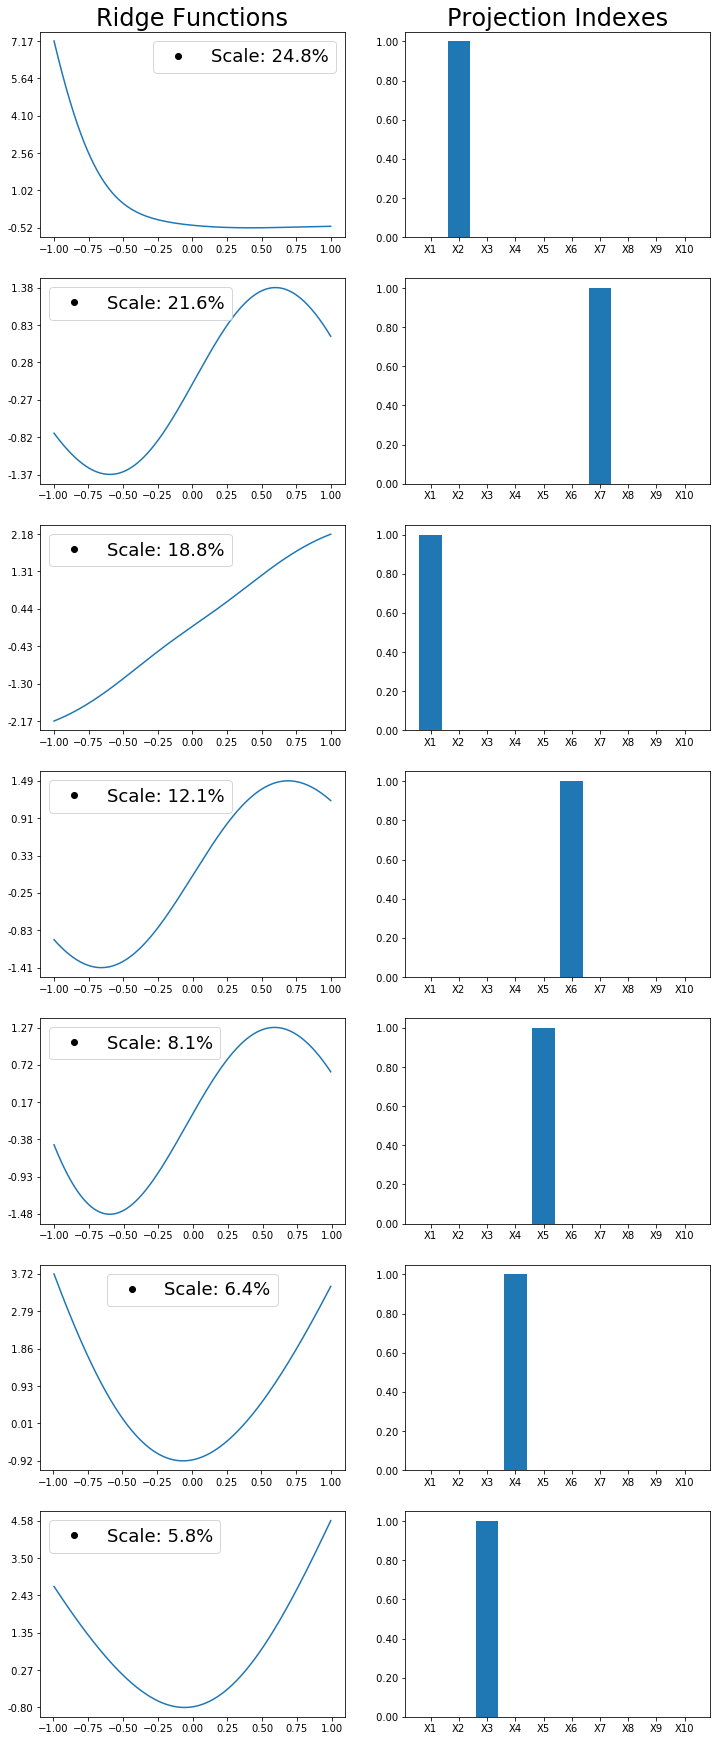

In [3]:
tf.random.set_seed(0)
model = GAMNet(input_num = 10, input_dummy_num=0, subnet_arch=[10, 6], task="Regression",
               activation_func=tf.tanh, batch_size=1000, training_epochs=5000, lr_bp=0.001,
               beta_threshold=0.05, tuning_epochs=200, l1_subnet=0.001, smooth_lambda = 10**(-5),
               verbose=True, val_ratio=0.2, early_stop_thres=200)
model.fit(train_x, train_y)
model.visualize("./", "test")

In [4]:
tr_pred = model.predict(model.tr_x) 
val_pred = model.predict(model.val_x) 
pred_test = model.predict(test_x)

sosxnn_mse_stat = np.hstack([np.round(np.mean((scaler_y.inverse_transform(tr_pred) - scaler_y.inverse_transform(model.tr_y))**2),5),\
                             np.round(np.mean((scaler_y.inverse_transform(val_pred) - scaler_y.inverse_transform(model.val_y))**2),5),\
               np.round(np.mean((scaler_y.inverse_transform(pred_test) - scaler_y.inverse_transform(test_y))**2),5)])
print(sosxnn_mse_stat)

[1.12077 1.16754 1.14254]
